In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import pandas as pd
import numpy as np 
import seaborn as sn
import codecs
import statsmodels as st
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

In [3]:
url = 'https://github.com/swidrak/data/blob/master/jmuiTouch.xlsx?raw=true'
touch = pd.read_excel(url)

In [4]:
touch.columns

Index(['id', 'study', 'participant', 'agentNum', 'agent', 'masculinity',
       'status', 'pleasantness', 'awkwardness', 'adecuacy', 'natural',
       'surprising', 'pleasant', 'weak', 'adecuate', 'weird', 'scary', 'nice',
       'sync'],
      dtype='object')

In [5]:
# Dropping unnecessary columns
df = touch[['natural', 'surprising', 'pleasant', 'weak', 'adecuate', 'weird', 'scary', 'nice','sync']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   natural     398 non-null    int64
 1   surprising  398 non-null    int64
 2   pleasant    398 non-null    int64
 3   weak        398 non-null    int64
 4   adecuate    398 non-null    int64
 5   weird       398 non-null    int64
 6   scary       398 non-null    int64
 7   nice        398 non-null    int64
 8   sync        398 non-null    int64
dtypes: int64(9)
memory usage: 28.1 KB


In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(735.9945202973237, 8.873194473299388e-132)

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
import factor_analyzer

kmo_all,kmo_model=calculate_kmo(df)

In [9]:
kmo_model

0.7166673001581542

In [10]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(df)

# Check Eigenvalues
fa.get_eigenvalues()
ev, v = fa.get_eigenvalues()
ev

#eigenvalues > 1 are good, so here we have 3-factors

array([2.88908147, 1.38476592, 1.03741103, 0.92111092, 0.83647313,
       0.64113912, 0.47854426, 0.47094817, 0.34052599])

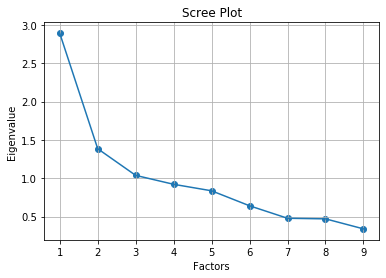

<Figure size 432x288 with 0 Axes>

In [18]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

plt.savefig('factors')
#The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.
#Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

In [12]:
# Create factor analysis object and perform factor analysis
fa1 = FactorAnalyzer(3, rotation="varimax")
fa1.fit(df)
loads = fa1.loadings_
#columns show loadings of each factor - factor 1, factor 2, factor 3

In [13]:
#'natural', 1
#'surprising', 2
#'pleasant', 1
#'weak', ?
#'adecuate', 1
#'weird', 2
#'scary', 2
#'nice', 1
#'sync' ?

#1 = natural, pleasant, adecuate, nice
#2 = surprising, weird, scary

In [17]:
loads = pd.DataFrame(data=loads, columns=["f1", "f2", "f3"], index=['natural', 'surprising', 'pleasant', 'weak', 'adecuate', 'weird', 'scary', 'nice', 'sync'])
loads
loads.to_csv('C://Users//justy//OneDrive//Documents//myDrafts//JMUI//submission2//loadings.csv')

In [16]:
# Get variance of each factors
fa1.get_factor_variance()
#rows: SS loadings, proportion variance, cumulative variance
#columns - factor 1, factor 2, factor 3

(array([1.64704359, 1.2201011 , 1.19780387]),
 array([0.18300484, 0.13556679, 0.13308932]),
 array([0.18300484, 0.31857163, 0.45166095]))

In [17]:
#Total 45% cumulative Variance explained by the 3 factors.

In [18]:
scores = fa1.transform(df)

In [19]:
df2 = pd.DataFrame(data=scores, columns=["pleasantness", "awkwardness", "adecuacy"])
df2

pleasantness  awkwardness  adecuacy
0       -0.616920     0.946847  0.205775
1        0.915980     0.249687  1.627100
2        0.135909     0.750030  1.849814
3       -0.424840     0.604354  2.015430
4        0.424581    -0.430160 -0.059480
..            ...          ...       ...
393      0.295415     0.272234 -0.080633
394     -0.933841     0.755325  0.326671
395     -0.432513     0.817836 -0.825327
396      0.361762     0.480530  0.794955
397     -0.684844     0.708509  0.214186

[398 rows x 3 columns]

In [20]:
all = pd.concat([touch,df2], axis=1, sort=True)

In [21]:
all

id  study  participant  agentNum  agent    masculinity   status  \
0      3      1            0         2      1       feminine  neutral   
1      4      1            0         2      1       feminine  neutral   
2      5      1            0         2      1       feminine  neutral   
3      6      1            0         2      1       feminine  neutral   
4      7      1            0         2      1       feminine  neutral   
..   ...    ...          ...       ...    ...            ...      ...   
393  238      3            1         2      1  stereotypical     high   
394  239      3            1         2      1  stereotypical     high   
395  240      3            1         2      1  stereotypical     high   
396  241      3            1         2      1  stereotypical     high   
397  242      3            1         2      1  stereotypical     high   

     pleasantness  awkwardness  adecuacy  ...  pleasant  weak  adecuate  \
0        2.333333     3.666667         3  ...         2     3         3   
1        3.666667     2.000000         5  ...         4     4         5   
2        2.666667     3.000000         5  ...         3     3         5   
3        2.666667     2.666667         5  ...         2     4         5   
4        3.666667     2.666667         3  ...         2     1         3   
..            ...          ...       ...  ...       ...   ...       ...   
393      3.000000     3.000000         3  ...         3     3         3   
394      2.000000     4.000000         3  ...         2     2         3   
395      1.666667     3.333333         2  ...         2     4         2   
396      2.333333     2.000000         4  ...         1     2         4   
397      1.666667     3.000000         3  ...         2     3         3   

     weird  scary  nice  sync  pleasantness  awkwardness  adecuacy  
0        4      3     1     4     -0.616920     0.946847  0.205775  
1        1      2     4     2      0.915980     0.249687  1.627100  
2        3      3     3     4      0.135909     0.750030  1.849814  
3        3      2     2     4     -0.424840     0.604354  2.015430  
4        4      2     4     4      0.424581    -0.430160 -0.059480  
..     ...    ...   ...   ...           ...          ...       ...  
393      3      3     3     4      0.295415     0.272234 -0.080633  
394      5      4     1     4     -0.933841     0.755325  0.326671  
395      4      2     2     3     -0.432513     0.817836 -0.825327  
396      1      1     4     4      0.361762     0.480530  0.794955  
397      4      1     1     4     -0.684844     0.708509  0.214186  

[398 rows x 22 columns]

(0, 5)

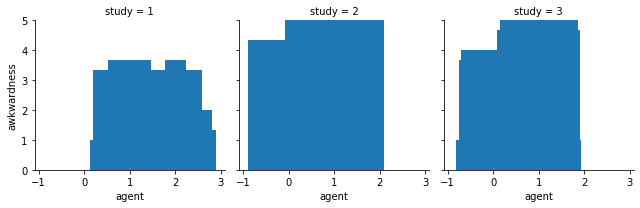

In [22]:
g = sn.FacetGrid(all, col='study',  palette='winter')
g = g.map(plt.bar, 'agent', 'awkwardness')
plt.ylim(0,5)

(0, 5)

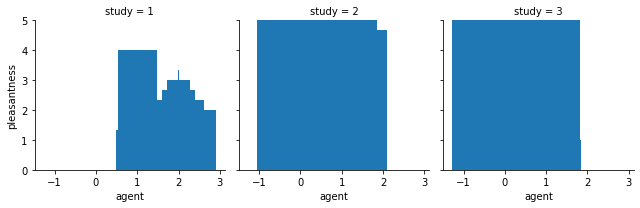

In [23]:
g = sn.FacetGrid(all, col='study',  palette='winter')
g = g.map(plt.bar, 'agent', 'pleasantness')
plt.ylim(0,5)

(0, 5)

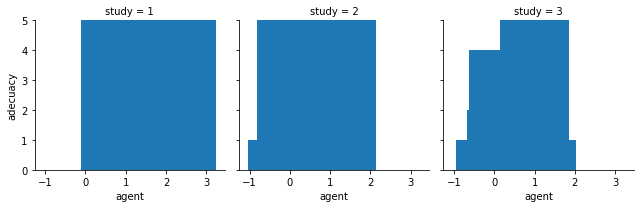

In [24]:
g = sn.FacetGrid(all, col='study',  palette='winter')
g = g.map(plt.bar, 'agent', 'adecuacy')
plt.ylim(0,5)

In [25]:
all.to_excel("C://Users//justy//Documents//PythonScripts//jmui//touch.xlsx")